# Document Details and imports


 


```
**CREATED BY - Razia patel
Date-24 march
CODE related to - Assignment3 Topics: HYPOTHESIS TESTING - Problem 2 ,Problem 3 and PRoblem 4


```

# Q2)
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


H0:u1=u2=u3=u4 ,H1:Atleast one of the mean is not equal((even if one of them is not same ie atleast one different ) )

df_labtat['Laboratory 1'] mean 178.36158333333339
df_labtat['Laboratory 2'] mean 178.9029166666668
df_labtat['Laboratory 3'] mean 199.91325000000003
df_labtat['Laboratory 4'] mean 163.6827499999999


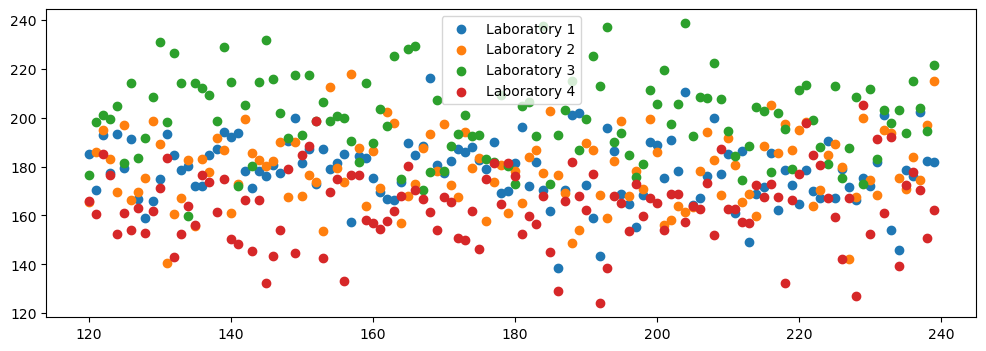

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [32]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df_labtat= pd.read_csv('labTaT.csv')

print("df_labtat['Laboratory 1'] mean",df_labtat['Laboratory 1'].mean())
print("df_labtat['Laboratory 2'] mean",df_labtat['Laboratory 2'].mean())
print("df_labtat['Laboratory 3'] mean",df_labtat['Laboratory 3'].mean())
print("df_labtat['Laboratory 4'] mean",df_labtat['Laboratory 4'].mean())

plt.figure(figsize=(12,4))

plt.scatter(range(120,240),df_labtat['Laboratory 1'].values)
plt.scatter(range(120,240),df_labtat['Laboratory 2'])
plt.scatter(range(120,240),df_labtat['Laboratory 3'])
plt.scatter(range(120,240),df_labtat['Laboratory 4'])

plt.legend(df_labtat.columns)
plt.show()

stats.f_oneway(df_labtat['Laboratory 1'],df_labtat['Laboratory 2'], df_labtat['Laboratory 3'],df_labtat['Laboratory 4'])

conclusion : Pvalue is very low hence we will reject the null hypothesis that u1=u2=u3=u4 ,
On cross validation with our scatter plot we can conclude that we have analysed our hypothesis correclty.


# Q3)
Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

Null Hypothesis:  HO :The male-female buyer ratios are similar across all four regions.

Alternative Hypothesis:Ha :The male-female buyer ratios are not similar across all four regions.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df_buyerRatio=pd.read_csv('BuyerRatio.csv')

df_buyerRatio['Observed Values']=df_buyerRatio['Observed Values'].astype('category')
df_buyerRatio = df_buyerRatio.set_index('Observed Values') # note for chisquare it takes all int values so always our category should be set as index in our df before passing the data frame.







In [35]:
from scipy.stats import chi2_contingency
# Perform chi-square test
chi2_stat, p_val, dof, expected =chi2_contingency(df_buyerRatio) #test statistic, p-value, dof, expected freq
# Print the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 1.595945538661058
P-value: 0.6603094907091882
Degrees of freedom: 3
Expected frequencies:
[[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


the chi-square test statistic is 1.595945538661058 and the corresponding p-value is 0.6603094907091882,the p-value is greater than the significance level (alpha), typically 0.05, hence we fail to reject the null hypothesis. In other words, we do not have sufficient evidence to support the alternative hypothesis and we conclude that there is no significant difference between the observed data and the expected data.All proportions are equal 

In the context of the chi-square test, this means that the observed data fits the expected distribution and there is no significant difference between the observed and expected frequencies. Therefore, we can conclude that there is no evidence of a relationship between the variables being studied.

# Q4)
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


To analyze the data and help the manager draw appropriate inferences, we need to perform a hypothesis test. 
We will perform a chi-squared test of independence to test whether the defective % varies by center.

We can set up our hypothesis test as follows:

Null Hypothesis (H0): The defective % is the same for all centers.
Alternative Hypothesis (Ha): The defective % is different for at least one center.
We will use a significance level of 0.05.

In [30]:
from scipy.stats import chi2_contingency
import pandas as pd


dfCustomer_data= pd.read_csv('Costomer+OrderForm.csv')
count= {}
for column  in dfCustomer_data.columns:
    errorfreesum = (dfCustomer_data[column]== 'Error Free').sum()
    defectiveSum = (dfCustomer_data[column]=='Defective').sum()
#     print(f'Column {column}: Error Free={errorfreesum}, Defective={defectiveSum}')
    count[column]={'Error Free':errorfreesum,'Defective':defectiveSum}
    
    
dfCustomer_datacategorised=pd.DataFrame(count)

# dfCustomer_datacategorised=dfCustomer_datacategorised.set_index('Observed Values') 

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(dfCustomer_datacategorised) #test statistic, p-value, dof, expected freq
# Print the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 3.858960685820355
P-value: 0.2771020991233135
Degrees of freedom: 3
Expected frequencies:
[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


the chi-square test statistic is 3.858960685820355 and the corresponding p-value is 0.2771020991233135,the p-value is greater than the significance level (alpha), typically 0.05, hence we fail to reject the null hypothesis. In other words, we do not have sufficient evidence to support the alternative hypothesis and we conclude that there is no significant difference between the observed data and the expected data.The defective % is the same for all centers

In the context of the chi-square test, this means that the observed data fits the expected distribution and there is no significant difference between the observed and expected frequencies. Therefore, we can conclude that there is no evidence of a relationship between the variables being studied.